<a href="https://colab.research.google.com/github/Gowtham181806/AIML-PROJECT/blob/main/randam%20forset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [6]:
import pandas as pd

# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Save as CSV in the working directory
df.to_csv('iris.csv', index=False)

In [7]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [8]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

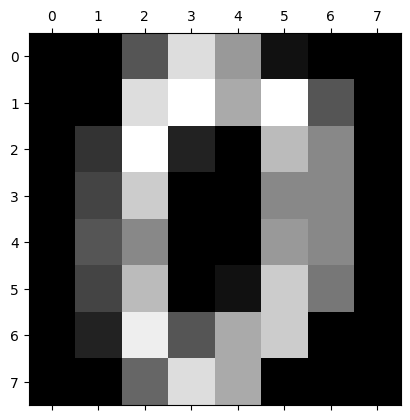

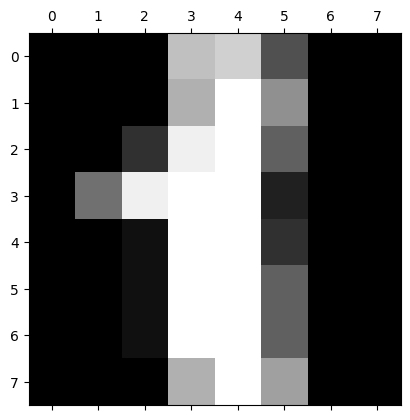

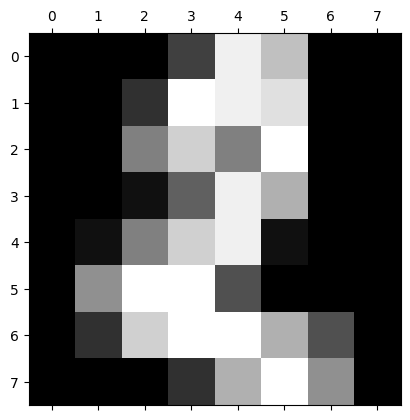

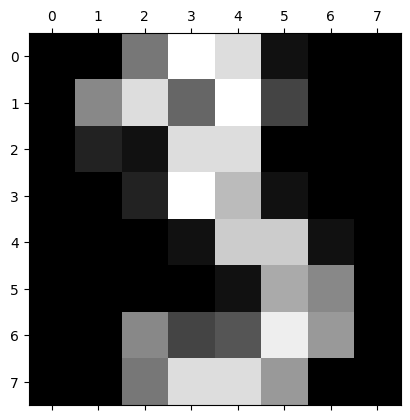

In [10]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

    df = pd.DataFrame(digits.data)
    df.head()

In [11]:
df['target'] = digits.target

In [12]:
X = df.drop('target',axis='columns')
y = df.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=60)
model.fit(X_train, y_train)

In [14]:
model.score(X_test, y_test)

NameError: name 'model' is not defined

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=60)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60)

In [17]:
model.score(X_test, y_test)

0.9722222222222222

In [18]:
y_predicted = model.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 26,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  1],
       [ 0,  3,  0,  0,  0,  1,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 35]])

Text(95.72222222222221, 0.5, 'Truth')

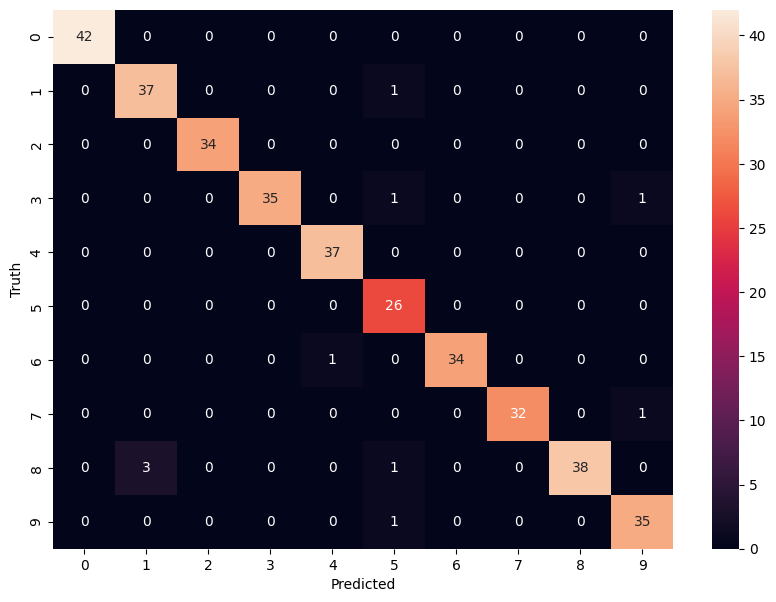

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
data = load_iris()
X, y = data.data, data.target

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
clf_default = RandomForestClassifier(random_state=42)
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)
default_score = accuracy_score(y_test, y_pred_default)
print(f"Accuracy with default 10 trees: {default_score:.4f}")

Accuracy with default 10 trees: 1.0000


In [28]:
best_score = 0
best_n = 0
n_trees_range = []
accuracy_scores = []
for n_trees in range(1, 101):  # Trying from 1 to 100 trees
    clf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    n_trees_range.append(n_trees)
    accuracy_scores.append(score)
    if score > best_score:
        best_score = score
        best_n = n_trees

print(f"Best accuracy: {best_score:.4f} with {best_n} trees")

Best accuracy: 1.0000 with 1 trees


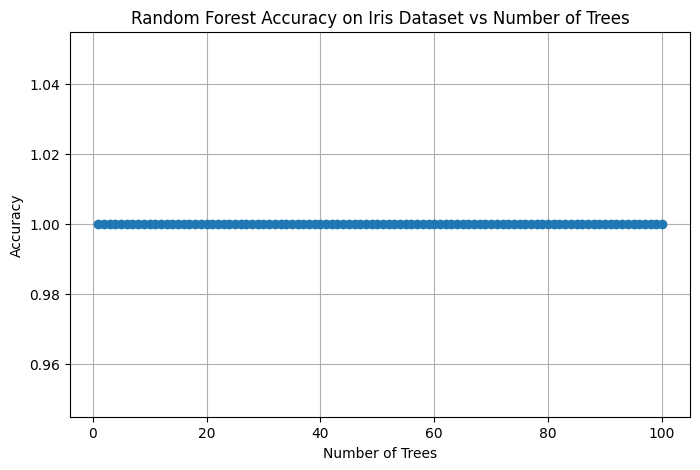

In [29]:
plt.figure(figsize=(8, 5))
plt.plot(n_trees_range, accuracy_scores, marker='o')
plt.title('Random Forest Accuracy on Iris Dataset vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()